### Cartera de inversión Crypto

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

In [2]:
# Data range
start = '2020-01-01'
end = '2024-7-09'

# Tickers of assets 
main = ['BTC-USD', 'ETH-USD']
Defi = ['SOL-USD', 'BNB-USD', 'SUI20947-USD','FTM-USD','TON11419-USD', 'AVAX-USD', 'ADA-USD','APT21794-USD', 'UNI7083-USD', 'BCH-USD'] #'TRX-USD'
finance = ['XRP-USD','LINK-USD', 'AAVE-USD', 'HBAR-USD']
memes = ['DOGE-USD','PEPE24478-USD', 'WIF-USD', 'BONK-USD', 'FOXY30591-USD']
l2 = ['MNT27075-USD']
ia = ['RNDR-USD', 'NEAR-USD', 'GRT6719-USD', 'ICP-USD', 'TAO22974-USD']
assets = main + Defi + finance + memes + l2 + ia

In [3]:
assets.sort()
# Downloading data
data = yf.download(assets, start=start, end=end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%***********************]  27 of 27 completed


In [4]:
# Calculating Returns

Y = data[assets].pct_change().dropna()
display(Y.head())

,AAVE-USD,ADA-USD,APT21794-USD,AVAX-USD,BCH-USD,BNB-USD,BONK-USD,BTC-USD,DOGE-USD,ETH-USD,...,NEAR-USD,PEPE24478-USD,RNDR-USD,SOL-USD,SUI20947-USD,TAO22974-USD,TON11419-USD,UNI7083-USD,WIF-USD,XRP-USD
Date,,,,,,,,,,,,,,,,,,,,,
2024-04-13 00:00:00+00:00,-17.2088%,-11.0544%,-10.3773%,-13.5455%,-9.9637%,-7.0560%,-11.7647%,-5.0217%,-12.2734%,-7.3430%,...,-9.6555%,-16.6667%,-8.8303%,-9.3037%,-14.2445%,-5.5358%,-10.5781%,-12.7512%,-12.2248%,-12.3255%
2024-04-14 00:00:00+00:00,6.3199%,4.6891%,8.8653%,9.5017%,9.6404%,2.3306%,6.6667%,3.0041%,5.9523%,5.0598%,...,9.2103%,0.0000%,19.5944%,8.5712%,12.4693%,15.2696%,13.6811%,8.5578%,30.1178%,4.8748%
2024-04-15 00:00:00+00:00,-3.6146%,-1.7308%,-4.4530%,-5.7863%,-3.7855%,-2.5288%,-6.2500%,-3.5177%,-0.5644%,-1.7530%,...,-8.6235%,0.0000%,-7.4174%,-8.4452%,-2.2212%,-10.4525%,-2.9962%,-3.5824%,-9.8633%,-1.2944%
2024-04-16 00:00:00+00:00,2.2570%,-0.4753%,1.4042%,-1.1121%,-4.0370%,-2.7213%,0.0000%,0.6080%,-3.3340%,-0.5378%,...,5.2864%,0.0000%,-0.2429%,-1.6095%,4.5328%,-4.9077%,-3.3236%,-0.8304%,-2.4637%,-0.2081%
2024-04-17 00:00:00+00:00,-3.6887%,-3.1203%,-1.2104%,-3.5091%,-4.8825%,-0.6346%,-6.6667%,-3.9729%,-5.3747%,-3.2478%,...,-1.6378%,0.0000%,-7.4012%,-3.2383%,2.7757%,-8.9608%,-4.0642%,-4.2964%,-9.8201%,-0.3733%


### 2. Estimating Mean Variance Portfolios
### 2.1. Calculating the portfolio that maximizes Sharpe Ratio

In [5]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns =Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov)

# Estimate optimal portfolio:

model ='Classic' 
rm = 'MV'
obj = 'Sharpe'
hist = True
rf = 0
l = 0

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w)

,weights
AAVE-USD,0.0000%
ADA-USD,0.0000%
APT21794-USD,0.0000%
AVAX-USD,0.0000%
BCH-USD,0.0000%
BNB-USD,0.0000%
BONK-USD,27.7812%
BTC-USD,0.0000%
DOGE-USD,0.0000%
ETH-USD,0.0000%


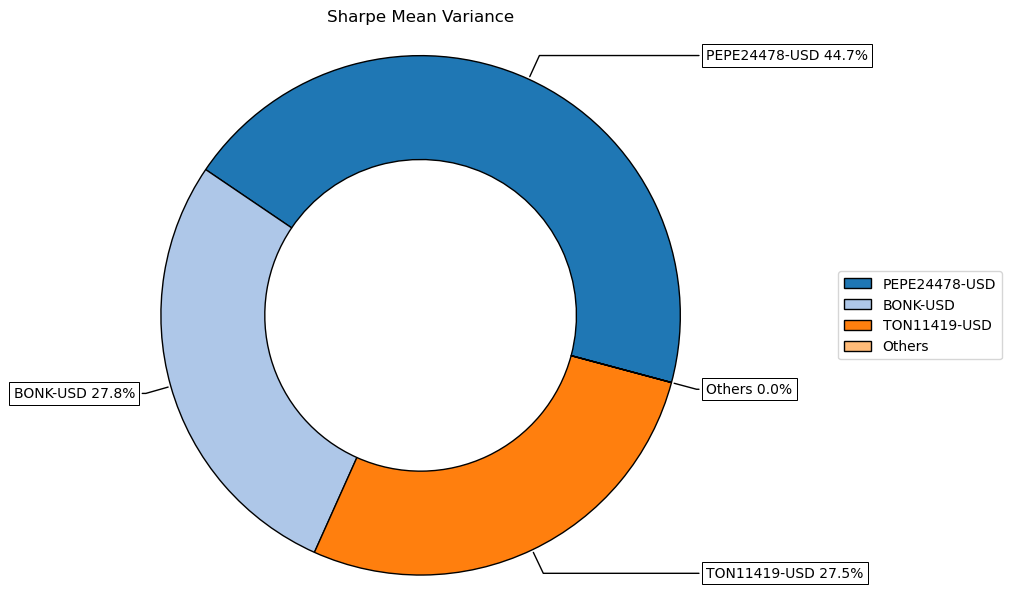

In [6]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None);


### 2.3 Calculate efficient frontier

In [7]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,AAVE-USD,ADA-USD,APT21794-USD,AVAX-USD,BCH-USD,BNB-USD,BONK-USD,BTC-USD,DOGE-USD,ETH-USD,...,NEAR-USD,PEPE24478-USD,RNDR-USD,SOL-USD,SUI20947-USD,TAO22974-USD,TON11419-USD,UNI7083-USD,WIF-USD,XRP-USD
0,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,16.6638%,0.0000%,55.1178%,0.0000%,0.0000%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,28.2183%
1,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,18.9047%,0.0000%,51.9120%,0.0000%,0.7858%,...,0.0000%,2.6248%,0.0000%,0.0000%,0.0000%,0.0000%,13.9213%,0.0000%,0.0000%,11.8514%
2,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,17.6233%,0.0000%,48.7269%,0.0000%,3.3585%,...,0.0000%,5.4157%,0.0000%,0.0000%,0.0000%,0.0000%,19.4084%,0.0000%,0.0000%,5.4672%
3,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,16.6461%,0.8799%,46.1161%,0.0000%,4.9269%,...,0.0000%,7.2951%,0.0000%,0.0000%,0.0000%,0.0000%,23.7792%,0.0000%,0.0000%,0.3567%
4,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,13.9172%,2.0550%,41.1715%,0.0000%,5.7585%,...,0.0000%,8.9732%,0.0000%,0.0000%,0.0000%,0.0000%,28.1246%,0.0000%,0.0000%,0.0000%


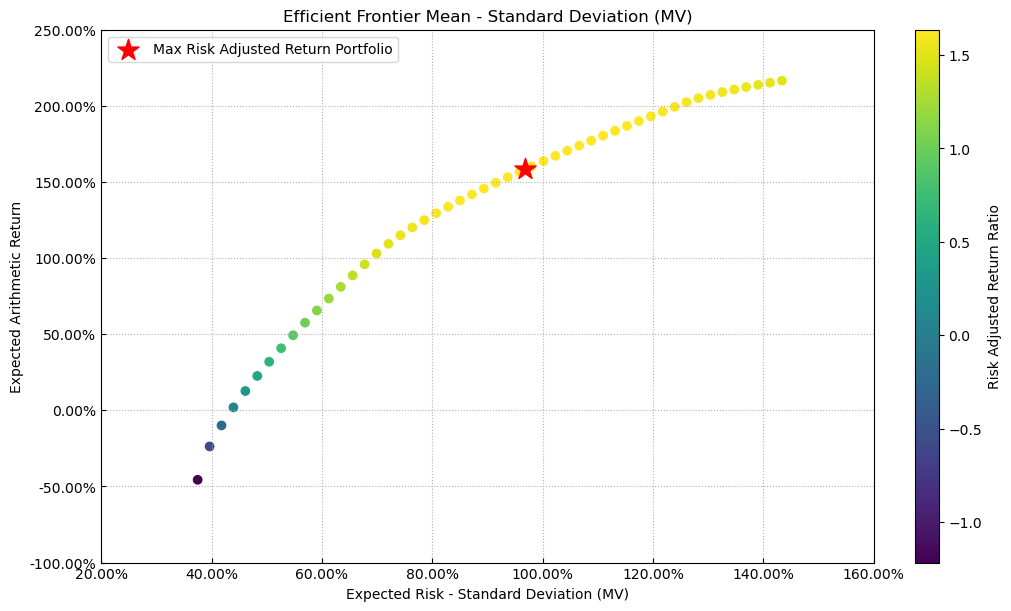

In [8]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

NameError: name 'plt' is not defined

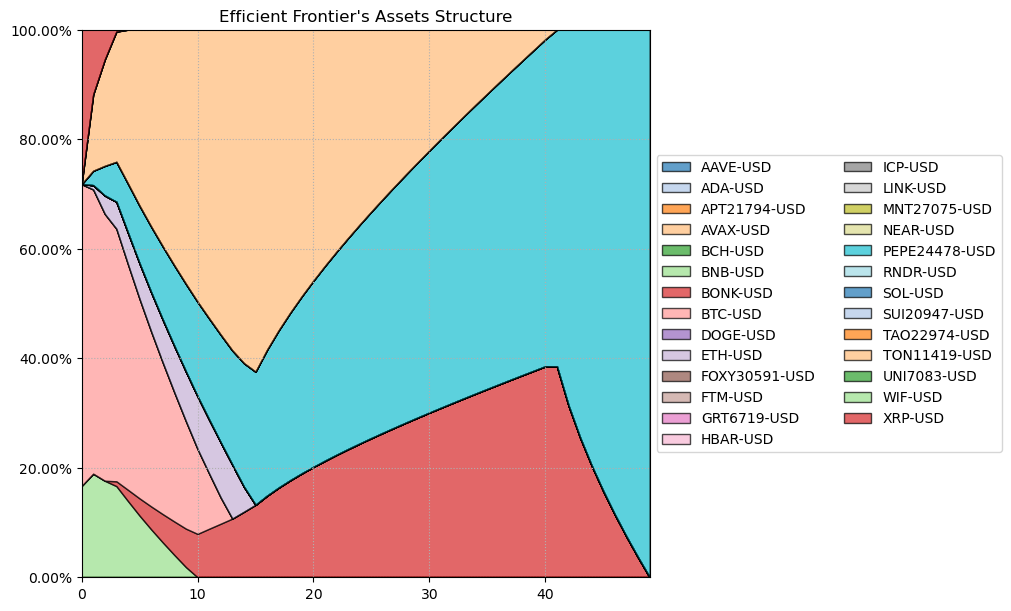

In [9]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)
plt.show()

### 3. Estimating Mean Risk Portfolios

In this part I will calculate optimal portfolios for several risk measures. First I'm going to calculate the portfolio that maximizes risk adjusted return when CVaR is the risk measure, then I'm going to calculate the portfolios that maximize the risk adjusted return for all available risk measures.

In [ ]:
rm = 'CVaR' # Risk measure

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,AAVE-USD,ADA-USD,APT21794-USD,AVAX-USD,BCH-USD,BNB-USD,BONK-USD,BTC-USD,DOGE-USD,ETH-USD,...,NEAR-USD,PEPE24478-USD,RNDR-USD,SOL-USD,SUI20947-USD,TAO22974-USD,TON11419-USD,UNI7083-USD,WIF-USD,XRP-USD
weights,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,53.676976%,0.000000%,0.000000%,0.000000%,...,0.000000%,46.323023%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%


### 3.2 Plotting portfolio composition


In [ ]:
ax = rp.plot_pie(w=w, title='Sharpe Mean CVaR', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)


### 3.3 Calculate efficient frontier


In [ ]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,AAVE-USD,ADA-USD,APT21794-USD,AVAX-USD,BCH-USD,BNB-USD,BONK-USD,BTC-USD,DOGE-USD,ETH-USD,...,NEAR-USD,PEPE24478-USD,RNDR-USD,SOL-USD,SUI20947-USD,TAO22974-USD,TON11419-USD,UNI7083-USD,WIF-USD,XRP-USD
0,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,95.478973%,0.000000%,0.000000%,...,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,4.521027%,0.000000%,0.000000%,0.000000%,0.000000%
1,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,6.451123%,93.548877%,0.000000%,0.000000%,...,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%
2,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,11.500725%,88.499275%,0.000000%,0.000000%,...,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%
3,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,16.440743%,83.559257%,0.000000%,0.000000%,...,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%
4,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,20.936004%,79.063996%,0.000000%,0.000000%,...,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%


In [ ]:
label = 'Max Risk Adjusted Return Portfolio' # Title of point

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)


In [ ]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)


In [ ]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']

w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

In [ ]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')


,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI,EDaR
AAVE-USD,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
ADA-USD,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
APT21794-USD,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
AVAX-USD,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BCH-USD,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BNB-USD,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BONK-USD,27.78%,15.53%,44.73%,0.00%,47.34%,53.68%,81.06%,96.03%,19.76%,9.43%,11.72%,8.08%,12.62%
BTC-USD,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
DOGE-USD,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
ETH-USD,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


In [ ]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)

<Axes: >

In [ ]:
asset_classes = {'Assets': ['BTC-USD', 'ETH-USD','SOL-USD', 'BNB-USD', 'SUI20947-USD','FTM-USD','TON11419-USD', 'AVAX-USD', 'ADA-USD','APT21794-USD', 'UNI7083-USD', 'BCH-USD','XRP-USD','LINK-USD', 'AAVE-USD', 'HBAR-USD', 'DOGE-USD','PEPE24478-USD', 'WIF-USD', 'BONK-USD', 'FOXY30591-USD','MNT27075-USD','RNDR-USD', 'NEAR-USD', 'GRT6719-USD', 'ICP-USD', 'TAO22974-USD'],
                 'Industry': ['MAIN-CRYPTO','MAIN-CRYPTO', 'DEFI-CRYPTO', 'DEFI-CRYPTO','DEFI-CRYPTO', 'DEFI-CRYPTO', 'DEFI-CRYPTO','DEFI-CRYPTO',
                              'DEFI-CRYPTO', 'DEFI-CRYPTO', 'DEFI-CRYPTO', 'DEFI-CRYPTO', 'FINANCE-CRYPTO', 'FINANCE-CRYPTO', 'FINANCE-CRYPTO', 'FINANCE-CRYPTO','MEME-CRYPTO', 'MEME-CRYPTO', 'MEME-CRYPTO', 'MEME-CRYPTO', 'MEME-CRYPTO','L2', 'AI', 'AI','AI', 'AI', 'AI']}

asset_classes = pd.DataFrame(asset_classes)
asset_classes = asset_classes.sort_values(by=['Assets'])
asset_classes

,Assets,Industry
14,AAVE-USD,FINANCE-CRYPTO
8,ADA-USD,DEFI-CRYPTO
9,APT21794-USD,DEFI-CRYPTO
7,AVAX-USD,DEFI-CRYPTO
11,BCH-USD,DEFI-CRYPTO
3,BNB-USD,DEFI-CRYPTO
19,BONK-USD,MEME-CRYPTO
0,BTC-USD,MAIN-CRYPTO
16,DOGE-USD,MEME-CRYPTO
1,ETH-USD,MAIN-CRYPTO


In [ ]:
constraints = {'disabled': [False, False, False, False, False],
               'Type':["All assets",'Classes', 'Classes', 'Classes','Classes'],
               'Set':['', 'Industry', 'Industry', 'Industry', 'Industry'],
               'Position':['','MAIN-CRYPTO', 'MEME-CRYPTO', 'DEFI-CRYPTO', 'AI'],
               'Sign':['<=','<=', '<=', '<=', '<='],
               'Weight': [0.10, 0.40, 0.1, 0.25, 0.20],
                'Type Relative': ['', '', '','',''],
               'Relative Set': ['', '', '', '',''],
               'Relative': ['', '', '', '',''],
               'Factor': ['', '', '','','']}
constraints = pd.DataFrame(constraints)

display(constraints)

,disabled,Type,Set,Position,Sign,Weight,Type Relative,Relative Set,Relative,Factor
0,False,All assets,,,<=,10.000000%,,,,
1,False,Classes,Industry,MAIN-CRYPTO,<=,40.000000%,,,,
2,False,Classes,Industry,MEME-CRYPTO,<=,10.000000%,,,,
3,False,Classes,Industry,DEFI-CRYPTO,<=,25.000000%,,,,
4,False,Classes,Industry,AI,<=,20.000000%,,,,


In [ ]:
A, B = rp.assets_constraints(constraints, asset_classes)

In [ ]:
port.ainequality = A
port.binequality = B

model = 'Classic'
rm = 'MV'
obj = 'Sharpe'
rf = 0

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,AAVE-USD,ADA-USD,APT21794-USD,AVAX-USD,BCH-USD,BNB-USD,BONK-USD,BTC-USD,DOGE-USD,ETH-USD,...,NEAR-USD,PEPE24478-USD,RNDR-USD,SOL-USD,SUI20947-USD,TAO22974-USD,TON11419-USD,UNI7083-USD,WIF-USD,XRP-USD
weights,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,40.000000%,...,0.000000%,10.000000%,0.000000%,0.000000%,0.000000%,0.000000%,25.000000%,0.000000%,0.000000%,0.000000%


In [ ]:
w


,weights
AAVE-USD,0.000000%
ADA-USD,0.000000%
APT21794-USD,0.000000%
AVAX-USD,0.000000%
BCH-USD,0.000000%
BNB-USD,0.000000%
BONK-USD,0.000000%
BTC-USD,0.000000%
DOGE-USD,0.000000%
ETH-USD,40.000000%


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Pie(labels=w.index, 
                             values=w.weights, 
                             hole=.4, 
                             textinfo='label+percent',
                             textposition='outside',
                             )])

fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=10, title_text="portfolio")

fig.show()